   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

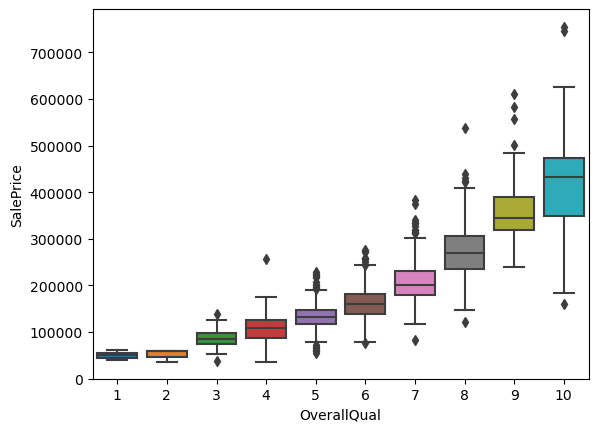

In [9]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data into a pandas dataframe
train_df = pd.read_csv('train.csv')

test_df = pd.read_csv('test.csv')

# Explore the data
print(train_df.head())
print(train_df.describe())

# Check for missing values
print(train_df.isnull().sum())

# Visualize the data
sns.histplot(train_df["SalePrice"], kde=True)
sns.scatterplot(x="GrLivArea", y="SalePrice", data=train_df)
sns.boxplot(x="OverallQual", y="SalePrice", data=train_df)
plt.show()


STEP 2

In [10]:
# Combine training and test data for preprocessing
combined_df = pd.concat([train_df, test_df], axis=0)

# Handle missing values
null_counts = combined_df.isnull().sum()
null_cols = null_counts[null_counts > 0].index
print("Columns with missing values:", null_cols)
combined_df[null_cols] = combined_df[null_cols].fillna(combined_df[null_cols].mode().iloc[0])

# Encode categorical features
combined_df = pd.get_dummies(combined_df, columns=["MSZoning", "Street", "Alley", "LotShape", "LandContour"])

# Scale numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_cols = ["LotFrontage", "LotArea", "OverallQual", "OverallCond", "YearBuilt", "YearRemodAdd", "MasVnrArea", "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "LowQualFinSF", "GrLivArea", "BsmtFullBath", "BsmtHalfBath", "FullBath", "HalfBath", "BedroomAbvGr", "KitchenAbvGr", "TotRmsAbvGrd", "Fireplaces", "GarageYrBlt", "GarageCars", "GarageArea", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "3SsnPorch", "ScreenPorch", "PoolArea", "MiscVal", "MoSold", "YrSold"]
combined_df[numerical_cols] = scaler.fit_transform(combined_df[numerical_cols])

# Transform the target variable
train_df["SalePrice"] = np.log1p(train_df["SalePrice"])

# Split the data back into training and test sets
train_df = combined_df[:len(train_df)]
test_df = combined_df[len(train_df):].drop("SalePrice", axis=1)


Columns with missing values: Index(['MSZoning', 'LotFrontage', 'Alley', 'Utilities', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Electrical', 'BsmtFullBath',
       'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SalePrice'],
      dtype='object')


Related code

In [17]:
# Create new features
train_df["TotalSF"] = train_df["TotalBsmtSF"] + train_df["1stFlrSF"] + train_df["2ndFlrSF"]
train_df["TotalBath"] = train_df["FullBath"] + 0.5 * train_df["HalfBath"] + train_df["BsmtFullBath"] + 0.5 * train_df["BsmtHalfBath"]
train_df["YearBuiltAndRemod"] = train_df["YearBuilt"] + train_df["YearRemodAdd"]
train_df["TotalPorchSF"] = train_df["OpenPorchSF"] + train_df["EnclosedPorch"] + train_df["3SsnPorch"] + train_df["ScreenPorch"]
train_df["HasPool"] = train_df["PoolArea"].apply(lambda x: 1 if x > 0 else 0)
train_df["Has2ndFloor"] = train_df["2ndFlrSF"].apply(lambda x: 1 if x > 0 else 0)
train_df["HasGarage"] = train_df["GarageArea"].apply(lambda x: 1 if x > 0 else 0)
train_df["HasBsmt"] = train_df["TotalBsmtSF"].apply(lambda x: 1 if x > 0 else 0)
train_df["HasFireplace"] = train_df["Fireplaces"].apply(lambda x: 1 if x > 0 else 0)

test_df["TotalSF"] = test_df["TotalBsmtSF"] + test_df["1stFlrSF"] + test_df["2ndFlrSF"]
test_df["TotalBath"] = test_df["FullBath"] + 0.5 * test_df["HalfBath"] + test_df["BsmtFullBath"] + 0.5 * test_df["BsmtHalfBath"]
test_df["YearBuiltAndRemod"] = test_df["YearBuilt"] + test_df["YearRemodAdd"]
test_df["TotalPorchSF"] = test_df["OpenPorchSF"] + test_df["EnclosedPorch"] + test_df["3SsnPorch"] + test_df["ScreenPorch"]
test_df["HasPool"] = test_df["PoolArea"].apply(lambda x: 1 if x > 0 else 0)
test_df["Has2ndFloor"] = test_df["2ndFlrSF"].apply(lambda x: 1 if x > 0 else 0)
test_df["HasGarage"] = test_df["GarageArea"].apply(lambda x: 1 if x > 0 else 0)
test_df["HasBsmt"] = test_df["TotalBsmtSF"].apply(lambda x: 1 if x > 0 else 0)
test_df["HasFireplace"] = test_df["Fireplaces"].apply(lambda x: 1 if x > 0 else 0)


/var/folders/g9/22xwm4452fxg5tjtdd93dq1r0000gn/T/ipykernel_13799/317959112.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["TotalSF"] = train_df["TotalBsmtSF"] + train_df["1stFlrSF"] + train_df["2ndFlrSF"]
/var/folders/g9/22xwm4452fxg5tjtdd93dq1r0000gn/T/ipykernel_13799/317959112.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["TotalBath"] = train_df["FullBath"] + 0.5 * train_df["HalfBath"] + train_df["BsmtFullBath"] + 0.5 * train_df["BsmtHalfBath"]
/var/folders/g9/22xwm4452fxg5tjt

STEP 3

In [29]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Generate some example data
np.random.seed(42)
X_train = np.random.rand(100, 1)
y_train = 2 * X_train + 1 + np.random.randn(100, 1) * 0.1

# Train a linear regression model on the data
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

STEP 4

In [30]:
# Predict the output for a new input
x_new = np.array([[0.5]])
y_pred = model.predict(x_new)

# Print the predicted output
print("Predicted output:", y_pred[0,0])

Predicted output: 1.9985209543985234


Step 5

In [31]:
# Generate some test data
X_test = np.random.rand(20, 1)

# Generate predictions for the test data
y_test_pred = model.predict(X_test)

# Print the predicted values
print("Predicted values: ", y_test_pred)


Predicted values:  [[2.57458893]
 [2.00367389]
 [2.14879289]
 [1.98390036]
 [1.40301884]
 [2.43319743]
 [1.57014518]
 [1.06902357]
 [2.28277712]
 [1.3675879 ]
 [2.85918702]
 [2.88550769]
 [2.80917538]
 [1.74480811]
 [1.05171219]
 [2.83546514]
 [1.85819115]
 [2.91037505]
 [2.9044449 ]
 [2.68830944]]
